# Community Detection

Community Detection is an unsupervised task, where no label information can be used to train a graph neural network. Its ultimate objective is to group (cluster) nodes into groups. A natural way to do community detection is to learn node embeddings in an unsupervised manner and then perform clustering algorithms on the node embeddings.

<hr/>

### Node Embedding Algorithms
##### Doesn't require node features
- Adjacency matrix
- Node2Vec
- Watch your step

##### Requires node features
- Cosine distance matrix
- Deep Graph Infomax (DGI) - extracts self information of graph as well as each node representation and then maximize the mutual information between graph representation and node representations.
- Attr2vec - learns node representations by performing a linear/non-linear mapping on node content attributes.
- Unsupervised GraphSAGE - given a large set of "positive" node pairs generated from random walks performed on the graph, and an equally large set of "negative" node pairs that are randomly selected from the graph according to a certain distrubution, learn a binary classifier that predicts whether arbitrary node pairs are likely to co-occur in a random walk. Through learning this simple binary node-pair-classification task, the model automatically learns an inductive mapping from attirubtes of nodes and their neighbors to node embeddings in a high-dimensional vector space.


### Clustering Algorithms
##### Common ML clustering algorithms to use from sklearn
- K-means
- Hierarchical clustering, a.k.a. Agglomerative Clustering
- DBSCAN

### Combined Algorithms
- Fast Greedy
- Infomap
- Label Propagation
- Leading eigenvector
- Leiden
- Multilevel (Louvain)
- Walktrap

### Future algorithm consideration
- Modularity maximization
- CommDGI
- Gaussian Mixture Clustering
- Optimal Modularity

### Algorithms out of scope and its reason
- Edge betweenness - too slow
- Leading eigenvector_naive - doesn't support?
- Optimal Modularity - igraph error
- Spinglass - doesn't work with disconnected graphs
- GraphWave - Not practical

##### Resources:
- Clustering Algorithms in sklearn: https://scikit-learn.org/stable/modules/clustering.html

In [5]:
### IMPORTING the script files
import sys
sys.path.insert(1, '../')

In [6]:
from models import util_data, util_graph

In [3]:
! python ../models/community_detection/adjMat_kmeans.py

In [7]:
# Other imports
import pandas as pd
import networkx as nx

In [8]:
# Arguments to get from system
node_filename = '../../data/nodes.csv'
edge_filename = '../../data/edges_withTotalPriceUSD.csv'
node_id_col = 'Id'
node_attr_cols = []
edge_src_col = 'SellerAddress'
edge_dst_col = 'WinnerAddress'
edge_attr_cols = ['TotalPriceUSD', 'TokenId']

# Read Dataset

In [9]:
# # Need to get TotalPriceUSD in order to use it as edge attribute
# eth_df = pd.read_csv("../../data/2017-01-01_2021-10-31_ethereumprice_org.csv")
# eth_df = eth_df[eth_df['open'] != 'undefined']
# eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp'], unit='s')
# eth_df['date_str'] = eth_df['timestamp'].apply(lambda dt: str(dt)[:10])
# eth_df['time_str'] = eth_df['timestamp'].apply(lambda dt: str(dt)[-8:])
# eth_df = eth_df[eth_df['time_str'] == "00:00:00"]
# eth_df = eth_df[['date_str', 'open']].set_index('date_str')
# eth_df.columns = ["eth_open_price"]
# eth_df = eth_df.append(pd.DataFrame([3787.989114], index=['2021-09-04'], columns=['eth_open_price']))

# edge_df = pd.read_csv('../../data/edges.csv')
# temp_df = edge_df[edge_df['EventType'] == 'successful']
# temp_df['date'] = temp_df['Timestamp'].str[:10]
# temp_df = temp_df.join(eth_df, on='date')
# temp_df['TotalPrice'] = temp_df['TotalPrice'].astype("float")/(10**18)
# temp_df['TotalPriceUSD'] = temp_df['TotalPrice'] * temp_df['eth_open_price']

# temp_df = temp_df.rename(columns = {'SellerAddress': 'WinnerAddress', 'WinnerAddress': 'SellerAddress'})
# temp_df = temp_df.fillna("")
# temp_df.to_csv("../../data/edges_withTotalPriceUSD.csv")

In [10]:
node_df = util_data.read_node_data(node_filename, node_id_col, node_attr_cols)
edge_df = util_data.read_edge_data(edge_filename, edge_src_col, edge_dst_col, edge_attr_cols)

In [11]:
G_nx = util_graph.create_graph_nx(node_df, edge_df, 
                                  node_id_col=node_id_col, 
                                  edge_src_col=edge_src_col, edge_dst_col=edge_dst_col,
                                  node_attr_cols=node_attr_cols, edge_attr_cols=edge_attr_cols)

In [13]:
list(G_nx.nodes())

['0x906e55e1035c8a0828f249c173d8090e8fd5f189',
 '0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7',
 '0x0a4eafeb533d4111a1fe3a8b323c468976ac2323',
 '0xa4eafeb533d4111a1fe3a8b323c468976ac2323',
 '0xd7c902fbbcd3c9db2da80a439c94486c50eb81',
 '0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d',
 '0xe369a8d4e8799d381cd5734eafd812cfb5c2574a',
 '0xd93033ac253ce4320128666d999c392cfc09a523',
 '0x80ac8b6f4cacea6129f5cf1365904f056b4e29ea',
 '0xb4bb4156e5e6ca5d81041f616c27dffb253b7845',
 '0x5efdb6d8c798c2c2bea5b1961982a5944f92a5c1',
 '0x2a98fcd155c9da4a28bdb32acc935836c233882a',
 '0x7d438bf6567673867480b7923669bf349e6c8c12',
 '0x5a483c063b6b2b4f0baafbfe799a3504dd477dae',
 '0x1d45f16967a6b5c485524e67868105e6145846e3',
 '0xcfe0137ab4318af4f1eb38287c6b37c186869784',
 '0x1bc3621fd2348d46fa54524d165d50b5163902ba',
 '0x5fd716a418613dee7b440fc84afd63a8823629c4',
 '0x1a96afe48e215c47d80eeff6eef64685247c2503',
 '0x6abc0b05b554212a6bcdc10f6bff26017d5adbb0',
 '0xe9e7b800ec5fc6015cf6b2826711254bab3c12e4',
 '0x196a3dc84469

In [10]:
edge_src_col

'SellerAddress'

In [11]:
edge_dst_col

'WinnerAddress'

In [12]:
edge_attr_cols

['TotalPriceUSD']

In [ ]:
nx.set_edge_attributes()

In [26]:
G = nx.MultiGraph()

In [37]:
edge_df

,SellerAddress,WinnerAddress,TotalPriceUSD
0,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,0x906e55e1035c8a0828f249c173d8090e8fd5f189,170545.079200
1,0x0a4eafeb533d4111a1fe3a8b323c468976ac2323,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,120462.520000
2,0xd7c902fbbcd3c9db2da80a439c94486c50eb81,0xa4eafeb533d4111a1fe3a8b323c468976ac2323,0.000000
3,0xe369a8d4e8799d381cd5734eafd812cfb5c2574a,0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d,18069.228221
4,0xd93033ac253ce4320128666d999c392cfc09a523,0xe369a8d4e8799d381cd5734eafd812cfb5c2574a,14455.382577
...,...,...,...
14414,0xee3766e4f996dc0e0f8c929954eaafef3441de87,0xcf6165e56c3383978f6eaaf58b314af41569c0f0,34690.790010
14415,0xc352b534e8b987e036a93539fd6897f53488e56a,0xa0a59ca1ee70155da46bb8913d6d87c28dd4a7a3,0.000000
14416,0xf5099e196469257c0d457e896a648d5f616af034,0xe08c32737c021c7d05d116b00a68a02f2d144ac0,0.000000
14417,0xd7c902fbbcd3c9db2da80a439c94486c50eb81,0xa0a59ca1ee70155da46bb8913d6d87c28dd4a7a3,0.000000


In [46]:
edge_df.set_index([edge_src_col, edge_dst_col])[['TotalPriceUSD', 'TokenId']].transpose().to_dict()

<ipython-input-46-a100da71945f>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  edge_df.set_index([edge_src_col, edge_dst_col])[['TotalPriceUSD', 'TokenId']].transpose().to_dict()


{('0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7',
  '0x906e55e1035c8a0828f249c173d8090e8fd5f189'): {'TotalPriceUSD': 170545.07919999998,
  'TokenId': 9159.0},
 ('0x0a4eafeb533d4111a1fe3a8b323c468976ac2323',
  '0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7'): {'TotalPriceUSD': 120462.52,
  'TokenId': 9159.0},
 ('0xd7c902fbbcd3c9db2da80a439c94486c50eb81',
  '0xa4eafeb533d4111a1fe3a8b323c468976ac2323'): {'TotalPriceUSD': 0.0,
  'TokenId': 8674.0},
 ('0xe369a8d4e8799d381cd5734eafd812cfb5c2574a',
  '0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d'): {'TotalPriceUSD': 18069.228220923666,
  'TokenId': 9158.0},
 ('0xd93033ac253ce4320128666d999c392cfc09a523',
  '0xe369a8d4e8799d381cd5734eafd812cfb5c2574a'): {'TotalPriceUSD': 14455.382576738932,
  'TokenId': 9158.0},
 ('0xb4bb4156e5e6ca5d81041f616c27dffb253b7845',
  '0x80ac8b6f4cacea6129f5cf1365904f056b4e29ea'): {'TotalPriceUSD': 372823.2949872824,
  'TokenId': 9157.0},
 ('0x5efdb6d8c798c2c2bea5b1961982a5944f92a5c1',
  '0xb4bb4156e5e6ca5d81041f616c27dffb2

In [48]:
for ind, row in edge_df.set_index([edge_src_col, edge_dst_col])[edge_attr_cols].iterrows():
    print({(ind[0], ind[1], str(counter)): row[edge_attr_cols].to_dict()})
    break


{('0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7', '0x906e55e1035c8a0828f249c173d8090e8fd5f189', '14419'): {'TotalPriceUSD': 170545.07919999998, 'TokenId': 9159.0}}


In [32]:
counter = 0
for ind, row in edge_df.set_index([edge_src_col, edge_dst_col])[edge_attr_cols].iterrows():
    nx.set_edge_attributes(G, {(ind[0], ind[1], str(counter)): row[edge_attr_cols].to_dict})
    counter += 1

In [33]:
print(nx.info(G))

MultiGraph with 5123 nodes and 14419 edges


In [29]:
    G.add_nodes_from(node_df[node_id_col].values.flatten().tolist())

In [30]:
    G.add_edges_from(edge_df[[edge_src_col, edge_dst_col]].values)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# Step 1. Define graph objects

In [23]:
G_nx = util_graph.create_graph_nx(node_df, edge_df, 
                                  node_id_col=node_id_col, 
                                  edge_src_col=edge_src_col, edge_dst_col=edge_dst_col,
                                  node_attr_cols=node_attr_cols, edge_attr_cols=edge_attr_cols)
print(nx.info(G_nx))

Graph with 5123 nodes and 12226 edges


In [10]:
G_ig = util_graph.create_graph_ig(nx.to_numpy_matrix(G_nx), graph_type='undirected')
G_ig.summary()

'IGRAPH U--- 5123 12226 -- '

In [14]:
print("# Nodes", G_nx.number_of_nodes())
print("# Edges", G_nx.number_of_edges())
print("Is this multigraph?", G_nx.is_multigraph())
print("The graph is disconnected into {} networks".format(nx.number_connected_components(G_nx)))

Gcc = sorted([G_nx.subgraph(c) for c in nx.connected_components(G_nx)], key=len, reverse=True)
cc_sizes = []
for cc in list(Gcc):
    cc_sizes.append(len(cc.nodes()))
print(cc_sizes)

# Nodes 5123
# Edges 12226
Is this multigraph? False
The graph is disconnected into 291 networks
[4736, 6, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# Step 2. Visualizing graph
This part is skipped (or not useful) as it will be done outside of API in order to be more interactive.

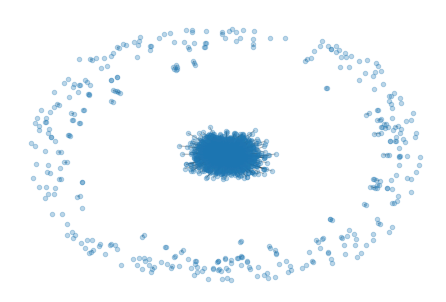

In [19]:
nx.draw(G, node_size=20, alpha=0.3)

# Step 3. AI Experiment

In [15]:
model_options = ['AdjMatrix_KMeans']#, 'AdjMatrix_Hierarchical', 'AdjMatrix_DBSCAN']
#                  'Node2Vec_KMeans', 
#                  'Node2Vec_Hierarchical', 
#                  'Node2Vec', 'DBSCAN'],
#                  'WatchYourStep', 'KMeans'], 
#                  'WatchYourStep', 'Hierarchical'], 
#                  'WatchYourStep', 'DBSCAN'],
#                  'FastGreedy'], 
#                  'Infomap'], 
#                  'LabelPropagation'], 
#                  'LeadingEigenvector'], 
#                  'Leiden'], 
#                  'Multilevel'], 
#                  'Walktrap']]

# # these options are possible when nodes have features
# model_options += [['CosineDist', 'KMeans'],
#                   ['CosineDist', 'Hierarchical'],
#                   ['CosineDist', 'DBSCAn'],
#                   ['CosineDist', 'GaussianMixture'],
#                   ['CosineDist', 'Modularity'],
#                   ['DGI', 'KMeans'],
#                   ['DGI', 'Hierarchical'],
#                   ['DGI', 'DBSCAn'],
#                   ['DGI', 'GaussianMixture'],
#                   ['DGI', 'Modularity'],
#                   ['Attri2Vec', 'KMeans'],
#                   ['Attri2Vec', 'Hierarchical'],
#                   ['Attri2Vec', 'DBSCAn'],
#                   ['Attri2Vec', 'GaussianMixture'],
#                   ['Attri2Vec', 'Modularity'],
#                   ['UnsupervisedGraphSAVE', 'KMeans'],
#                   ['UnsupervisedGraphSAVE', 'Hierarchical'],
#                   ['UnsupervisedGraphSAVE', 'DBSCAn'],
#                   ['UnsupervisedGraphSAVE', 'GaussianMixture'],
#                   ['UnsupervisedGraphSAVE', 'Modularity'],
#                  ]

n_clusters = range(5, 100, 20)
dist_thr = range(3, 10, 2)

eps=[0.3, 0.2]
min_samples = [3, 5]


# Node2Vec
walk_length = [5]
p = [0.5]  # defines probability, 1/p, of returning to source node
q = [2.0]  # defines probability, 1/q, for moving to a node away from the source node
epochs_node2vec = [2]

# Watch your step
attention_reg = [0.5]
epochs_wys = [100]

# Used by more than one embedding algorithms
walk_number = [80, 100]
emb_dim = [128]
optimizer = ['Adam']
learning_rate = [1e-3, 1e-4]
batch_size = [10] # Note that this does NOT impact model performance/training. It impacts the training speed and is limited by the server's memory. Thus, just give one value


In [1]:
# General package needs
import random
import itertools
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') # supress warnings due to some future deprications

# Graph-related package
import networkx as nx
import igraph as ig
import stellargraph as sg
from stellargraph import StellarGraph, globalvar

# Visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
### ML/AI specific

# ML/AI Workflow
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, feature_extraction, model_selection
from stellargraph.utils import plot_history

from stellargraph.mapper import (
    CorruptedGenerator,
    FullBatchNodeGenerator,
    GraphSAGENodeGenerator,
    HinSAGENodeGenerator,
    ClusterNodeGenerator,
    GraphSAGELinkGenerator,
    Node2VecLinkGenerator,
    Node2VecNodeGenerator,
    AdjacencyPowerGenerator
)
from stellargraph.data import (EdgeSplitter, BiasedRandomWalk)
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.callbacks import EarlyStopping

from stellargraph import datasets
from IPython.display import display, HTML

%matplotlib inline

# ML/AI Algorithms / Components
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from stellargraph.layer import GCN, DeepGraphInfomax, GraphSAGE, GAT, APPNP, HinSAGE
from stellargraph.layer import GraphSAGE, link_classification, Node2Vec, WatchYourStep
import tensorflow as tf
from tensorflow.keras import optimizers, Model, layers, regularizers
from tensorflow.keras.optimizers import Adam
from stellargraph.losses import graph_log_likelihood
# from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
random.seed(123)
tf.random.set_seed(1234)
# from stellargraph.core import StellarGraph

In [9]:
edge_df.head()

,index,SellerAddress,WinnerAddress,Timestamp,EventType,PaymenTokenSymbol,TotalPrice,TokenId,AssetContractAddress,AssetId,TransactionId,BidAmount,AssetNumSales,AssetOwnerAddress,FromAccountAddress,UsedEthscan,TransactionHash
0,18,0x906e55e1035c8a0828f249c173d8090e8fd5f189,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,2021-04-11T20:10:12,successful,ETH,79990000000000000000,9159,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178345,100167026.0,NaN,3,0x906e55e1035c8a0828f249c173d8090e8fd5f189,NaN,False,0xe4c985d1dadf4be3b1bca5dc4a4d44806c676c850cc0...
1,23,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,0x0a4eafeb533d4111a1fe3a8b323c468976ac2323,2021-04-11T01:20:32,successful,ETH,56500000000000000000,9159,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178345,99767950.0,NaN,3,0x906e55e1035c8a0828f249c173d8090e8fd5f189,NaN,False,0x18fb2f51fc2d939e2936e86657ee4eeb6d73792b865c...
2,33,0xa4eafeb533d4111a1fe3a8b323c468976ac2323,0xd7c902fbbcd3c9db2da80a439c94486c50eb81,2017-07-10T14:03:38,successful,ETH,0,9159,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178345,368886.0,NaN,3,0x906e55e1035c8a0828f249c173d8090e8fd5f189,NaN,True,0x9c335e2621879e05a6c7e7948af58a671d9efae7e439...
3,38,0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d,0xe369a8d4e8799d381cd5734eafd812cfb5c2574a,2021-02-15T08:50:46,successful,ETH,10000000000000000000,9158,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,530610,81978766.0,NaN,2,0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d,NaN,False,0x2b67c566d72d2cd4091960a89eed1c2a9825f985aa53...
4,43,0xe369a8d4e8799d381cd5734eafd812cfb5c2574a,0xd93033ac253ce4320128666d999c392cfc09a523,2021-02-15T08:15:30,successful,ETH,8000000000000000000,9158,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,530610,81973239.0,NaN,2,0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d,NaN,True,0x13c69a9e2178f2a3c445f3a382b8e103135a6d707021...


##### StellarGraph Object

In [8]:
stellarG = StellarGraph.from_networkx(G)

In [10]:
cluster_output = node_df.set_index('Id')
node_ID_list = list(cluster_output.index)
del node_df
del edge_df

The distribution of connected components' sizes shows that there is a single large component, and a few isolated groups.

We expect the community detection/node embedding clustering algorithms to discover non-trivial communities that are not simply the connected components of the graph.

### Step 3.0 Get a list of experimentations

In [14]:
required_hyperparameters = {
    'KMeans': ['n_clusters'],
    'Hierarchical': ['n_clusters'],
    'DBSCAN': ['eps', 'min_samples'],
    'AdjMatrix': [],
    'Node2Vec': ['walk_number', 'walk_length', 'p', 'q', 'batch_size', 'epochs_node2vec', 'emb_dim'],
    'WatchYourStep': ['walk_number', 'attention_reg', 'emb_dim', 'optimizer', 'learning_rate', 'batch_size', 'epochs_wys'],

    'FastGreedy': [],
    'Infomap': [],
    'LabelPropagation': [],
    'LeadingEigenvector': [],
    'Leiden': [],
    'Multilevel': [],
    'Walktrap': [],
    'OptimalModularity': []
}

exp = []
for model in model_options:
    added = False
    embedding_type = model[0] if len(model) > 1 else ""
    clustering_type = model[-1]
    
    # Get what hyperparameters are needed
    hyperparam_types = []
    for model_type in model:
        hyperparam_types+=required_hyperparameters[model_type]

    # Get permutation of hyperparameter ranges
    hyperparam_sets = [globals()[h] for h in hyperparam_types]
    hyperparam_perm = list(itertools.product(*hyperparam_sets))
    for hyperparam_vals in hyperparam_perm:
        hyperparam_dict = {}
        for i, name in enumerate(hyperparam_types):
            hyperparam_dict[name] = hyperparam_vals[i]
        exp.append([embedding_type, clustering_type, hyperparam_dict])
        added = True
        
    if not added:
        exp.append([embedding_type, clustering_type, {}])

In [15]:
exp_df = pd.DataFrame(exp, columns = ["embedding", "model", "hyperparam"])
print("TOTAL {} experiments".format(len(exp_df)))
exp_df.head(20)

TOTAL 105 experiments


,embedding,model,hyperparam
0,AdjMatrix,KMeans,{'n_clusters': 5}
1,AdjMatrix,KMeans,{'n_clusters': 25}
2,AdjMatrix,KMeans,{'n_clusters': 45}
3,AdjMatrix,KMeans,{'n_clusters': 65}
4,AdjMatrix,KMeans,{'n_clusters': 85}
5,AdjMatrix,Hierarchical,{'n_clusters': 5}
6,AdjMatrix,Hierarchical,{'n_clusters': 25}
7,AdjMatrix,Hierarchical,{'n_clusters': 45}
8,AdjMatrix,Hierarchical,{'n_clusters': 65}
9,AdjMatrix,Hierarchical,{'n_clusters': 85}


### Step 3.1 Get node embeddings when required by models

**TODO:** See if servers can share embeddings so that they can compute embeddings once and share across experiments

Below are functions to get the embeddings. Currently we compute the embeddings every time we need it when we actually run experiments

In [17]:
def compute_node2vec_embedding(G, node_ID_list, walk_number, walk_length, p, q, batch_size, epochs, emb_size):
    """ This requires StellagGraph object"""
    walker = BiasedRandomWalk(G, n=walk_number, length=walk_length, p=p, q=q)
    unsupervised_samples = UnsupervisedSampler(stellarG, nodes=node_ID_list, walker=walker)
    generator = Node2VecLinkGenerator(stellarG, batch_size)

    node2vec = Node2Vec(emb_size, generator=generator)
    x_inp, x_out = node2vec.in_out_tensors()

    x_inp_src = x_inp[0]
    x_out_src = x_out[0]
    embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)
    node_gen = Node2VecNodeGenerator(stellarG, batch_size).flow(node_ID_list)
    node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)
    return node_embeddings

In [18]:
def compute_watchYourStep_embedding(G, node_ID_list, epochs, walk_number, emb_dimension, attention_reg, optimizer, learning_rate, batch_size):
    """ This requires StellarGraph object. 
    Note that as of now, only Adam is allowed as an optimizer
    """
    generator = AdjacencyPowerGenerator(stellarG, num_powers=10)
    wys = WatchYourStep(
        generator,
        num_walks=walk_number,
        embedding_dimension=emb_dimension,
        attention_regularizer=regularizers.l2(attention_reg),
    )
    x_in, x_out = wys.in_out_tensors()

    model = Model(inputs=x_in, outputs=x_out)
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    model.compile(loss=graph_log_likelihood, optimizer=optimizer)

    train_gen = generator.flow(batch_size=batch_size, num_parallel_calls=10)

    history = model.fit(
        train_gen, epochs=epochs, verbose=0, steps_per_epoch=int(len(node_ID_list) // batch_size)
    )
    embeddings = wys.embeddings()
    return embeddings    

In [19]:
# embeddings = {}
# embeddings['Node2Vec'] = compute_node2vec_embedding(
#     stellarG, node_ID_list, walk_number, walk_length, p, q, batch_size, epochs, emb_size)
# embeddings['AdjMatrix'] = compute_adj_mat_dense(G)
# embeddings['WatchYourStep'] = compute_watchYourStep_embedding(
#     stellarG, node_ID_list, walk_number, emb_dimension, attention_reg, optimizer, batch_size)

### Step 3.2 Run Clustering

Below are functions to run clustering

In [20]:
def kmeans_clustering(X, n_cluster):
    model = KMeans(n_clusters=n_cluster)
    output = model.fit_predict(X)
    inertia = model.inertia_
    distortion = sum(np.min(cdist(X, model.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    perf_measure_dict = {'inertia': inertia, 'distortion': distortion}
    return model, output, perf_measure_dict

In [21]:
def agglomerative_clustering(X, n_cluster):
    model = AgglomerativeClustering(n_clusters=n_cluster, compute_distances=True)
    # model = AgglomerativeClustering(n_clusters=n_cluster, distance_threshold=dist_thr) # When it is driven by distance threshold rather than n_clusters
    output = model.fit_predict(X)
    perf_measure_dict = {'avg_distance': sum(model.distances_) / model.n_clusters_}
    return model, output, perf_measure_dict

In [22]:
def DBSCAN_clustering(X, eps, min_samples):
    try:
        model = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = model.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        silhouette_score = metrics.silhouette_score(X, labels)
        perf_measure_dict = {'n_cluster': n_clusters, 'n_noise': n_noise, 'silhouette_score': silhouette_score}
        return model, labels, perf_measure_dict
    except:
        return "failed", None, "failed"

In [23]:
def run_infomap(igraphG):
    """ Run infomap algorithm on a given igraph object"""
    c_infomap = igraphG.community_infomap()
    # print("Running infomap...")
    # print(c_infomap.summary())
    perf_measure_dict = {'modularity': c_infomap.modularity}
    return c_infomap, c_infomap.membership, perf_measure_dict

In [24]:
def run_fastGreedy(igraphG, node_ID_list):
    """ Run FastGreedy algorithm on a given igraph object"""
    c_fastgreedy = igraphG.community_fastgreedy().as_clustering()
    #print("Running fast greedy...")
    #print(c_fastgreedy.summary())
    perf_measure_dict = {'modularity': c_fastgreedy.modularity}
    return c_fastgreedy, c_fastgreedy.membership, perf_measure_dict

In [25]:
def run_labelProp(igraphG):
    """ Run label propagation algorithm on a given igraph object"""
    #print("Running label propagation...")
    c_label = igraphG.community_label_propagation()
    #print(c_label.summary())
    return c_label, c_label.membership, {'modularity': c_label.modularity}

In [26]:
def run_eigen(igraphG):
    """ Run Leading Eigenvector algorithm on a given igraph object"""
    #print("Running leading eigenvector...")
    c_eigen = igraphG.community_leading_eigenvector()
    #print(c_eigen.summary())
    return c_eigen, c_eigen.membership, {'modularity': c_eigen.modularity}

In [27]:
def run_leiden(igraphG):
    """ Run Leiden algorithm on a given igraph object"""
    #print("Running Leiden...")
    c_leiden = igraphG.community_leiden() # Note that there are hyperparameters that can be propvided
    #print(c_leiden.summary())
    return c_leiden, c_leiden.membership, {'modularity': c_leiden.modularity}

In [28]:
def run_multilevel(igraphG):
    """ Run multilevel algorithm on a given igraph object"""  
    #print("Running multilevel...")
    c_multilevel = igraphG.community_multilevel()
    #print(c_multilevel.summary())
    return c_multilevel, c_multilevel.membership, {'modularity': c_multilevel.modularity}


In [29]:
def run_walkTrap(igraphG, node_ID_list):
    """ Run WalkTrap algorithm on a given igraph object"""
    #print("Running Walk Trap...")
    c_walktrap = igraphG.community_walktrap().as_clustering()
    #print(c_walktrap.summary())
    return c_walktrap, c_walktrap.membership, {'modularity': c_walktrap.modularity}


### Step 3.3 Run experiments

**TODO** Save the model, output, and perf in a proper location?

In [30]:
exp_df['trained_model'] = None
exp_df['performance'] = None

for ind, row in exp_df.iterrows():
    embedding_type = row['embedding']
    clustering_model = row['model']
    hyperparam = row['hyperparam']
    
    if embedding_type == 'AdjMatrix':
        X = compute_adj_mat_dense(G)
    elif embedding_type == 'Node2Vec':
        X = compute_node2vec_embedding(stellarG, node_ID_list, 
                                       hyperparam['walk_number'], hyperparam['walk_length'], 
                                       hyperparam['p'], hyperparam['q'], hyperparam['batch_size'],
                                       hyperparam['epochs_node2vec'], hyperparam['emb_dim'])
    elif embedding_type == "WatchYourStep":
        X = compute_watchYourStep_embedding(stellarG, node_ID_list, hyperparam['epochs_wys'],
                                            hyperparam['walk_number'], hyperparam['emb_dim'],
                                            hyperparam['attention_reg'], hyperparam['optimizer'],
                                            hyperparam['learning_rate'], hyperparam['batch_size'])
      
    # Clustering
    if clustering_model == "KMeans":
        model, output, perf = kmeans_clustering(X, hyperparam['n_clusters'])
    elif clustering_model == "Hierarchical":
        model, output, perf = agglomerative_clustering(X, hyperparam['n_clusters'])
    elif clustering_model == "DBSCAN":
        model, output, perf = DBSCAN_clustering(X, hyperparam['eps'], hyperparam['min_samples'])
    elif clustering_model == "Infomap":
        model, output, perf = run_infomap(igraphG)
        print(model)
    elif clustering_model == "FastGreedy":
        model, output, perf = run_fastGreedy(igraphG, node_ID_list)
        print(model)
    elif clustering_model == "LabelPropagation":
        model, output, perf = run_labelProp(igraphG)
    elif clustering_model == "LeadingEigenvector":
        model, output, perf = run_eigen(igraphG)
    elif clustering_model == "Leiden":
        model, output, perf = run_leiden(igraphG)
    elif clustering_model == "Multilevel":
        model, output, perf = run_multilevel(igraphG)
    elif clustering_model == "Walktrap":
        model, output, perf = run_walkTrap(igraphG, node_ID_list)
        
    if model != "failed":   
        exp_df.loc[ind, 'trained_model'] = model # Note that this is a model object. Not serializable. IGraph clustering has an interesting __str__... 
        exp_df.loc[ind, 'performance'] = str(perf)    # Note that this is just a stringified dictionary that may contain different metrics
        cluster_output.loc[node_ID_list, 'cluster_exp{}'.format(ind)] = output
    else:
        print("ERRORED!!!!!")

513/513 [==============================] - 0s 778us/step
ERRORED!!!!!
513/513 [==============================] - 0s 802us/step
ERRORED!!!!!
513/513 [==============================] - 0s 795us/step
ERRORED!!!!!
513/513 [==============================] - 0s 793us/step
ERRORED!!!!!
513/513 [==============================] - 0s 802us/step
ERRORED!!!!!
513/513 [==============================] - 0s 821us/step
ERRORED!!!!!
513/513 [==============================] - 0s 811us/step
ERRORED!!!!!
513/513 [==============================] - 0s 807us/step
ERRORED!!!!!
ERRORED!!!!!
ERRORED!!!!!
ERRORED!!!!!
ERRORED!!!!!
ERRORED!!!!!
ERRORED!!!!!
ERRORED!!!!!
ERRORED!!!!!
ERRORED!!!!!
Clustering with 5124 elements and 360 clusters
[  0] 0, 1, 8, 9, 10, 11, 24, 25, 37, 38, 40, 41, 42, 44, 45, 47, 54, 56, 59,
      60, 61, 67, 68, 69, 70, 99, 100, 101, 118, 120, 121, 125, 126, 131, 142,
      149, 150, 152, 153, 156, 157, 163, 164, 165, 168, 169, 172, 173, 185,
      191, 192, 193, 206, 217, 218, 220, 23

Clustering with 5124 elements and 826 clusters
[  0] 0, 1, 427, 879, 902, 936, 1041, 1042, 1305, 1440, 1836, 2073, 2335,
      2380, 2421, 2854, 3020, 3129, 3169, 3228, 3242, 3246, 3291, 3443, 3718,
      3861, 4147, 4221, 4222, 4287, 4312, 4382, 4424, 4508, 4543, 4602, 4762,
      4923, 4995
[  1] 2, 43, 715, 1133, 1223, 2209, 3665
[  2] 3, 4, 87, 123, 124, 134, 184, 190, 200, 211, 226, 260, 261, 262, 319,
      324, 552, 665, 666, 702, 762, 772, 780, 900, 927, 962, 987, 1211, 1320,
      1413, 1417, 1422, 1510, 1529, 1838, 1974, 2032, 2066, 2110, 2111, 2433,
      2689, 2841, 2927, 2962, 3462, 3479, 3522, 3545, 3586, 3632, 3782, 3950,
      3960, 4460, 4562, 4599, 4679, 4765, 4781, 4981, 5006, 5020, 5077, 5096,
      5097
[  3] 5, 1081, 1082, 1485, 1591, 2008, 2300, 3301, 3997
[  4] 6, 178, 179, 247, 522, 523, 1289, 1290, 1642, 2345, 2368, 2369, 3255,
      3461, 4589, 4658, 4659
[  5] 7, 926, 1681, 3681
[  6] 8, 2228
[  7] 9, 739, 1001, 1788, 1801, 2320, 2807, 3289, 3367, 3372, 3877

In [31]:
exp_df.to_csv("opensea_batch_oct29.csv")
cluster_output.to_csv("opensea_cluster_output_oct29.csv")

In [137]:
json_format = {}
temp_df = cluster_output.astype('int').reset_index()
json_format['nodes'] = temp_df.to_dict("records")

eth_df = pd.read_csv("../data/2017-01-01_2021-10-31_ethereumprice_org.csv")
eth_df = eth_df[eth_df['open'] != 'undefined']
eth_df['timestamp'] = pd.to_datetime(eth_df['timestamp'], unit='s')
eth_df['date_str'] = eth_df['timestamp'].apply(lambda dt: str(dt)[:10])
eth_df['time_str'] = eth_df['timestamp'].apply(lambda dt: str(dt)[-8:])
eth_df = eth_df[eth_df['time_str'] == "00:00:00"]
eth_df = eth_df[['date_str', 'open']].set_index('date_str')
eth_df.columns = ["eth_open_price"]
eth_df = eth_df.append(pd.DataFrame([3787.989114], index=['2021-09-04'], columns=['eth_open_price']))

In [138]:
temp_df = edge_df[edge_df['EventType'] == 'successful']
temp_df['date'] = temp_df['Timestamp'].str[:10]
temp_df = temp_df.join(eth_df, on='date')
temp_df['TotalPrice'] = temp_df['TotalPrice'].astype("float")/(10**18)
temp_df['TotalPriceUSD'] = temp_df['TotalPrice'] * temp_df['eth_open_price']

temp_df = temp_df.rename(columns = {'SellerAddress': 'WinnerAddress', 'WinnerAddress': 'SellerAddress'})
temp_df = temp_df.fillna("")

In [140]:
temp_df = temp_df.rename(columns = {'SellerAddress': 'WinnerAddress', 'WinnerAddress': 'SellerAddress'})
temp_df = temp_df.fillna("")

In [141]:
temp_df.columns

Index(['index', 'WinnerAddress', 'SellerAddress', 'Timestamp', 'EventType',
       'PaymenTokenSymbol', 'TotalPrice', 'TokenId', 'AssetContractAddress',
       'AssetId', 'TransactionId', 'BidAmount', 'AssetNumSales',
       'AssetOwnerAddress', 'FromAccountAddress', 'UsedEthscan',
       'TransactionHash', 'date', 'eth_open_price', 'TotalPriceUSD'],
      dtype='object')

In [142]:

temp_df.columns = ['index', 'target', 'source', 'Timestamp', 'EventType',
       'PaymenTokenSymbol', 'TotalPrice', 'TokenId', 'AssetContractAddress',
       'AssetId', 'TransactionId', 'BidAmount', 'AssetNumSales',
       'AssetOwnerAddress', 'FromAccountAddress', 'UsedEthscan',
       'TransactionHash', 'date', 'eth_open_price', 'TotalPriceUSD']
json_format['links'] = temp_df.to_dict("records")

In [143]:
import json
with open('flask_app/flaskr/static/opensea_oct29.json', 'w') as outfile:
    json.dump(json_format, outfile)

In [145]:
temp_df.to_csv("flask_app/flaskr/static/edges.csv")

In [149]:
temp_df[temp_df['target'].isin(['0x906e55e1035c8a0828f249c173d8090e8fd5f189', '0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7'])][['index', 'target']].groupby('target').count()

,index
target,
0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,133
0x906e55e1035c8a0828f249c173d8090e8fd5f189,1


In [66]:
len(json_format['nodes'])

5124

In [78]:
exp_df

,embedding,model,hyperparam,trained_model,performance
0,AdjMatrix,KMeans,{'n_clusters': 5},KMeans(n_clusters=5),"{'inertia': 23228.861343794764, 'distortion': ..."
1,AdjMatrix,KMeans,{'n_clusters': 25},KMeans(n_clusters=25),"{'inertia': 20922.648178115152, 'distortion': ..."
2,AdjMatrix,KMeans,{'n_clusters': 45},KMeans(n_clusters=45),"{'inertia': 19793.863792747517, 'distortion': ..."
3,AdjMatrix,KMeans,{'n_clusters': 65},KMeans(n_clusters=65),"{'inertia': 18340.769972658025, 'distortion': ..."
4,AdjMatrix,KMeans,{'n_clusters': 85},KMeans(n_clusters=85),"{'inertia': 17478.001968724282, 'distortion': ..."
...,...,...,...,...,...
100,,LabelPropagation,{},"([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",{'modularity': 0.025559879962863928}
101,,LeadingEigenvector,{},"([0, 1, 23, 37, 44, 60, 67, 70, 90, 118, 125, ...",{'modularity': 0.3822812674134382}
102,,Leiden,{},"([0], [1], [2], [3], [4], [5], [6], [7], [8], ...",{'modularity': -0.0015866390996181448}
103,,Multilevel,{},"([0, 1, 23, 48, 49, 60, 166, 167, 326, 386, 42...",{'modularity': 0.4784468281521397}


In [67]:
temp_df.head()

,index,WinnerAddress,SellerAddress,Timestamp,EventType,PaymenTokenSymbol,TotalPrice,TokenId,AssetContractAddress,AssetId,TransactionId,BidAmount,AssetNumSales,AssetOwnerAddress,FromAccountAddress,UsedEthscan,TransactionHash
0,18,0x906e55e1035c8a0828f249c173d8090e8fd5f189,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,2021-04-11T20:10:12,successful,ETH,79990000000000000000,9159,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178345,100167026.0,,3,0x906e55e1035c8a0828f249c173d8090e8fd5f189,,False,0xe4c985d1dadf4be3b1bca5dc4a4d44806c676c850cc0...
1,23,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,0x0a4eafeb533d4111a1fe3a8b323c468976ac2323,2021-04-11T01:20:32,successful,ETH,56500000000000000000,9159,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178345,99767950.0,,3,0x906e55e1035c8a0828f249c173d8090e8fd5f189,,False,0x18fb2f51fc2d939e2936e86657ee4eeb6d73792b865c...
2,33,0xa4eafeb533d4111a1fe3a8b323c468976ac2323,0xd7c902fbbcd3c9db2da80a439c94486c50eb81,2017-07-10T14:03:38,successful,ETH,0,9159,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178345,368886.0,,3,0x906e55e1035c8a0828f249c173d8090e8fd5f189,,True,0x9c335e2621879e05a6c7e7948af58a671d9efae7e439...
3,38,0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d,0xe369a8d4e8799d381cd5734eafd812cfb5c2574a,2021-02-15T08:50:46,successful,ETH,10000000000000000000,9158,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,530610,81978766.0,,2,0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d,,False,0x2b67c566d72d2cd4091960a89eed1c2a9825f985aa53...
4,43,0xe369a8d4e8799d381cd5734eafd812cfb5c2574a,0xd93033ac253ce4320128666d999c392cfc09a523,2021-02-15T08:15:30,successful,ETH,8000000000000000000,9158,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,530610,81973239.0,,2,0xb9fddbd225b6c8cc24ce193e5fb95db76d783f2d,,True,0x13c69a9e2178f2a3c445f3a382b8e103135a6d707021...


In [73]:
cluster_output

,cluster_exp0,cluster_exp1,cluster_exp2,cluster_exp3,cluster_exp4,cluster_exp5,cluster_exp6,cluster_exp7,cluster_exp8,cluster_exp9,...,cluster_exp91,cluster_exp92,cluster_exp93,cluster_exp98,cluster_exp99,cluster_exp100,cluster_exp101,cluster_exp102,cluster_exp103,cluster_exp104
Id,,,,,,,,,,,,,,,,,,,,,
0x906e55e1035c8a0828f249c173d8090e8fd5f189,4.0,1.0,32.0,16.0,16.0,3.0,3.0,14.0,29.0,6.0,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,0.0,6.0,11.0,12.0,23.0,0.0,13.0,27.0,55.0,55.0,...,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0x0a4eafeb533d4111a1fe3a8b323c468976ac2323,4.0,1.0,32.0,62.0,16.0,3.0,8.0,3.0,11.0,11.0,...,-1.0,-1.0,-1.0,1.0,1.0,0.0,292.0,2.0,1.0,0.0
0xa4eafeb533d4111a1fe3a8b323c468976ac2323,4.0,24.0,30.0,16.0,76.0,3.0,8.0,7.0,3.0,10.0,...,-1.0,-1.0,-1.0,1.0,2.0,0.0,292.0,3.0,1.0,1.0
0xd7c902fbbcd3c9db2da80a439c94486c50eb81,2.0,24.0,14.0,62.0,42.0,3.0,8.0,7.0,3.0,8.0,...,-1.0,-1.0,-1.0,1.0,2.0,0.0,292.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x8bfe24fb29f57a6fe885884963549d905dc035f2,4.0,1.0,30.0,16.0,62.0,3.0,0.0,0.0,10.0,7.0,...,-1.0,-1.0,-1.0,18.0,341.0,0.0,299.0,5119.0,14.0,813.0
0x9179de43eafb051053f4ab99b9d9292d20eea723,4.0,1.0,30.0,16.0,62.0,3.0,0.0,0.0,10.0,7.0,...,-1.0,-1.0,-1.0,14.0,60.0,0.0,301.0,5120.0,17.0,14.0
0x3945476e477de76d53b4833a46c806ef3d72b21e,4.0,1.0,30.0,16.0,62.0,3.0,0.0,0.0,10.0,7.0,...,-1.0,-1.0,-1.0,14.0,60.0,0.0,301.0,5121.0,17.0,14.0


In [74]:
cluster_output.loc['0x906e55e1035c8a0828f249c173d8090e8fd5f189']

cluster_exp0       4.0
cluster_exp1       1.0
cluster_exp2      32.0
cluster_exp3      16.0
cluster_exp4      16.0
                  ... 
cluster_exp100     0.0
cluster_exp101     0.0
cluster_exp102     0.0
cluster_exp103     0.0
cluster_exp104     0.0
Name: 0x906e55e1035c8a0828f249c173d8090e8fd5f189, Length: 88, dtype: float64

# Miscellaneous

**TODO**
Below are code snippets for community detection when nodes have features.
Need to be cleaned up and added above.

In [ ]:
# TODO: NLP clustering: https://stellargraph.readthedocs.io/en/stable/demos/embeddings/metapath2vec-embeddings.html

In [19]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import random

import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, link_classification
from stellargraph.data import UniformRandomWalk
from stellargraph.data import UnsupervisedSampler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import accuracy_score

from stellargraph import globalvar

from stellargraph import datasets
from IPython.display import display, HTML

In [20]:
nodes = list(stellarG.nodes())
number_of_walks = 1
length = 5

In [21]:
unsupervised_samples = UnsupervisedSampler(
    stellarG, nodes=nodes, length=length, number_of_walks=number_of_walks
)

In [22]:
batch_size = 50
epochs = 4
num_samples = [10, 5]
generator = GraphSAGELinkGenerator(stellarG, batch_size, num_samples)
train_gen = generator.flow(unsupervised_samples)

In [23]:
layer_sizes = [50, 50]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=generator, bias=True, dropout=0.0, normalize="l2"
)



In [24]:
x_inp, x_out = graphsage.in_out_tensors()

In [25]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [26]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=1,
    use_multiprocessing=False,
    workers=4,
    shuffle=True,
)

Epoch 1/4
434/434 [==============================] - 34s 76ms/step - loss: 0.5881 - binary_accuracy: 0.7093
Epoch 2/4
434/434 [==============================] - 32s 73ms/step - loss: 0.5403 - binary_accuracy: 0.7765
Epoch 3/4
434/434 [==============================] - 32s 73ms/step - loss: 0.5341 - binary_accuracy: 0.7856
Epoch 4/4
434/434 [==============================] - 31s 71ms/step - loss: 0.5355 - binary_accuracy: 0.7885


In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from stellargraph.mapper import GraphSAGENodeGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



In [28]:
x_inp_src = x_inp[0::2]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)

In [33]:
node_ids = node_subjects.index
node_gen = GraphSAGENodeGenerator(stellarG, batch_size, num_samples).flow(node_ids)

In [34]:
node_embeddings = embedding_model.predict(node_gen, workers=4, verbose=1)

55/55 [==============================] - 2s 40ms/step


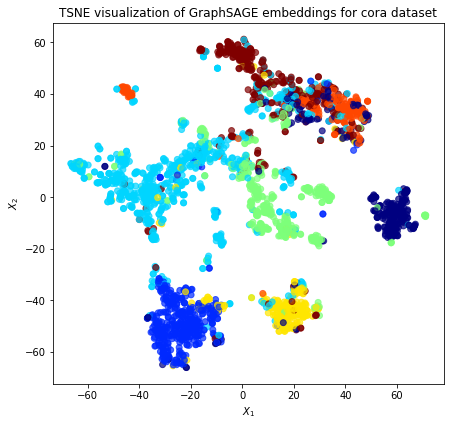

In [35]:
node_subject = node_subjects.astype("category").cat.codes

X = node_embeddings
if X.shape[1] > 2:
    transform = TSNE  # PCA

    trans = transform(n_components=2)
    emb_transformed = pd.DataFrame(trans.fit_transform(X), index=node_ids)
    emb_transformed["label"] = node_subject
else:
    emb_transformed = pd.DataFrame(X, index=node_ids)
    emb_transformed = emb_transformed.rename(columns={"0": 0, "1": 1})
    emb_transformed["label"] = node_subject
    
    
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].astype("category"),
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title(
    "{} visualization of GraphSAGE embeddings for cora dataset".format(transform.__name__)
)
plt.show()

In [24]:
import networkx as nx
import pandas as pd
import numpy as np
import os
import random

import stellargraph as sg
from stellargraph.data import UnsupervisedSampler
from stellargraph.mapper import Attri2VecLinkGenerator, Attri2VecNodeGenerator
from stellargraph.layer import Attri2Vec, link_classification

from tensorflow import keras

from pandas.core.indexes.base import Index

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

from stellargraph import datasets
from IPython.display import display, HTML

In [21]:
nodes = list(G.nodes())
number_of_walks = 4
length = 5


unsupervised_samples = UnsupervisedSampler(
    G, nodes=nodes, length=length, number_of_walks=number_of_walks
)



In [22]:
batch_size = 50
epochs = 4

In [25]:
generator = Attri2VecLinkGenerator(G, batch_size)
train_gen = generator.flow(unsupervised_samples)

In [26]:
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 2708, Edges: 5429

 Node types:
  paper: [2708]
    Features: float32 vector, length 1433
    Edge types: paper-cites->paper

 Edge types:
    paper-cites->paper: [5429]
        Weights: all 1 (default)
        Features: none


In [27]:
layer_sizes = [128]
attri2vec = Attri2Vec(
    layer_sizes=layer_sizes, generator=generator, bias=False, normalize=None
)

In [28]:
# Build the model and expose input and output sockets of attri2vec, for node pair inputs:
x_inp, x_out = attri2vec.in_out_tensors()



In [29]:
prediction = link_classification(
    output_dim=1, output_act="sigmoid", edge_embedding_method="ip"
)(x_out)


link_classification: using 'ip' method to combine node embeddings into edge embeddings


In [30]:
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy],
)

In [31]:
history = model.fit(
    train_gen,
    epochs=epochs,
    verbose=2,
    use_multiprocessing=False,
    workers=1,
    shuffle=True,
)

Epoch 1/4
1734/1734 - 4s - loss: 0.6970 - binary_accuracy: 0.5379
Epoch 2/4
1734/1734 - 4s - loss: 0.6358 - binary_accuracy: 0.6292
Epoch 3/4
1734/1734 - 4s - loss: 0.4934 - binary_accuracy: 0.7790
Epoch 4/4
1734/1734 - 4s - loss: 0.3905 - binary_accuracy: 0.8404


In [32]:
x_inp_src = x_inp[0]
x_out_src = x_out[0]
embedding_model = keras.Model(inputs=x_inp_src, outputs=x_out_src)


In [36]:
node_gen = Attri2VecNodeGenerator(G, batch_size).flow(subjects.index)
node_embeddings = embedding_model.predict(node_gen, workers=1, verbose=1)



50/50 [==============================] - 0s 749us/step


In [37]:
transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

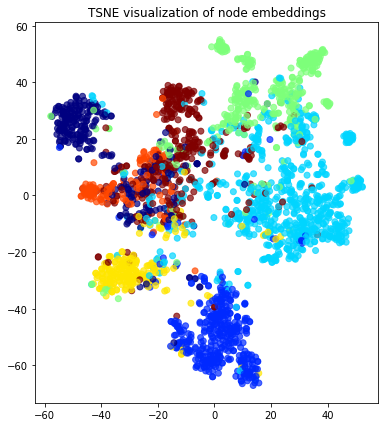

In [38]:
# draw the embedding points, coloring them by the target label (paper subject)
alpha = 0.7
label_map = {l: i for i, l in enumerate(np.unique(subjects))}
node_colours = [label_map[target] for target in subjects]

plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")
plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
)
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()



In [85]:
df = pd.read_csv("flask_app/flaskr/static/opensea_cluster_output_oct29.csv")


In [92]:
df

,Id,cluster_exp0,cluster_exp1,cluster_exp2,cluster_exp3,cluster_exp4,cluster_exp5,cluster_exp6,cluster_exp7,cluster_exp8,...,cluster_exp91,cluster_exp92,cluster_exp93,cluster_exp98,cluster_exp99,cluster_exp100,cluster_exp101,cluster_exp102,cluster_exp103,cluster_exp104
0,0x906e55e1035c8a0828f249c173d8090e8fd5f189,4.0,1.0,32.0,16.0,16.0,3.0,3.0,14.0,29.0,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7,0.0,6.0,11.0,12.0,23.0,0.0,13.0,27.0,55.0,...,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0x0a4eafeb533d4111a1fe3a8b323c468976ac2323,4.0,1.0,32.0,62.0,16.0,3.0,8.0,3.0,11.0,...,-1.0,-1.0,-1.0,1.0,1.0,0.0,292.0,2.0,1.0,0.0
3,0xa4eafeb533d4111a1fe3a8b323c468976ac2323,4.0,24.0,30.0,16.0,76.0,3.0,8.0,7.0,3.0,...,-1.0,-1.0,-1.0,1.0,2.0,0.0,292.0,3.0,1.0,1.0
4,0xd7c902fbbcd3c9db2da80a439c94486c50eb81,2.0,24.0,14.0,62.0,42.0,3.0,8.0,7.0,3.0,...,-1.0,-1.0,-1.0,1.0,2.0,0.0,292.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,0x8bfe24fb29f57a6fe885884963549d905dc035f2,4.0,1.0,30.0,16.0,62.0,3.0,0.0,0.0,10.0,...,-1.0,-1.0,-1.0,18.0,341.0,0.0,299.0,5119.0,14.0,813.0
5120,0x9179de43eafb051053f4ab99b9d9292d20eea723,4.0,1.0,30.0,16.0,62.0,3.0,0.0,0.0,10.0,...,-1.0,-1.0,-1.0,14.0,60.0,0.0,301.0,5120.0,17.0,14.0
5121,0x3945476e477de76d53b4833a46c806ef3d72b21e,4.0,1.0,30.0,16.0,62.0,3.0,0.0,0.0,10.0,...,-1.0,-1.0,-1.0,14.0,60.0,0.0,301.0,5121.0,17.0,14.0
5122,0xe08c32737c021c7d05d116b00a68a02f2d144ac0,4.0,1.0,30.0,16.0,62.0,3.0,0.0,0.0,10.0,...,-1.0,-1.0,-1.0,1.0,10.0,0.0,292.0,5122.0,1.0,196.0


In [102]:
temp = df[['Id', 'cluster_exp1']].groupby('cluster_exp1').count().reset_index()
temp.columns = ['cluster', 'id']
temp.to_dict('records')

[{'cluster': 0.0, 'id': 1},
 {'cluster': 1.0, 'id': 4617},
 {'cluster': 2.0, 'id': 1},
 {'cluster': 3.0, 'id': 1},
 {'cluster': 4.0, 'id': 1},
 {'cluster': 5.0, 'id': 1},
 {'cluster': 6.0, 'id': 1},
 {'cluster': 7.0, 'id': 1},
 {'cluster': 8.0, 'id': 1},
 {'cluster': 9.0, 'id': 1},
 {'cluster': 10.0, 'id': 1},
 {'cluster': 11.0, 'id': 1},
 {'cluster': 12.0, 'id': 1},
 {'cluster': 13.0, 'id': 1},
 {'cluster': 14.0, 'id': 1},
 {'cluster': 15.0, 'id': 1},
 {'cluster': 16.0, 'id': 1},
 {'cluster': 17.0, 'id': 105},
 {'cluster': 18.0, 'id': 1},
 {'cluster': 19.0, 'id': 273},
 {'cluster': 20.0, 'id': 1},
 {'cluster': 21.0, 'id': 1},
 {'cluster': 22.0, 'id': 1},
 {'cluster': 23.0, 'id': 1},
 {'cluster': 24.0, 'id': 107}]

In [14]:
fullbatch_generator = FullBatchNodeGenerator(G, sparse=False)
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)

corrupted_generator = CorruptedGenerator(fullbatch_generator)
gen = corrupted_generator.flow(G.nodes())

Using GCN (local pooling) filters...


In [15]:
def run_deep_graph_infomax(
    base_model, generator, epochs, reorder=lambda sequence, subjects: subjects
):
    corrupted_generator = CorruptedGenerator(generator)
    gen = corrupted_generator.flow(G.nodes())
    infomax = DeepGraphInfomax(base_model, corrupted_generator)

    x_in, x_out = infomax.in_out_tensors()

    model = Model(inputs=x_in, outputs=x_out)
    model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))
    history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])

    x_emb_in, x_emb_out = base_model.in_out_tensors()
    # for full batch models, squeeze out the batch dim (which is 1)
    if generator.num_batch_dims() == 2:
        x_emb_out = tf.squeeze(x_emb_out, axis=0)

    emb_model = Model(inputs=x_emb_in, outputs=x_emb_out)

    test_gen = generator.flow(test_subjects.index)
    train_gen = generator.flow(train_subjects.index)

    test_embeddings = emb_model.predict(test_gen)
    train_embeddings = emb_model.predict(train_gen)

    # some generators yield predictions in a different order to the .flow argument,
    # so we need to get everything lined up correctly
    ordered_test_subjects = reorder(test_gen, test_subjects)
    ordered_train_subjects = reorder(train_gen, train_subjects)

    lr = LogisticRegression(multi_class="auto", solver="lbfgs")
    lr.fit(train_embeddings, ordered_train_subjects)

    y_pred = lr.predict(test_embeddings)
    acc = (y_pred == ordered_test_subjects).mean()

    return acc

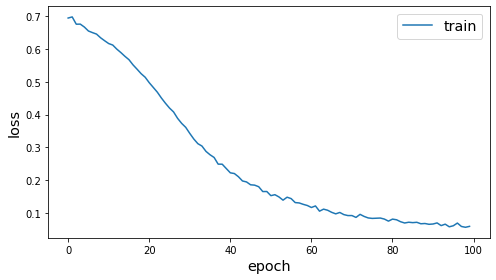

In [16]:
infomax = DeepGraphInfomax(gcn_model, corrupted_generator)
x_in, x_out = infomax.in_out_tensors()

model = Model(inputs=x_in, outputs=x_out)
model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))

epochs=100
es = EarlyStopping(monitor="loss", min_delta=0, patience=20)
history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])
plot_history(history)

In [17]:
cluster_generator = ClusterNodeGenerator(stellarG, clusters=12, q=4)
cluster_gcn_model = GCN(
    layer_sizes=[128], activations=["relu"], generator=cluster_generator
)


def cluster_reorder(sequence, subjects):
    # shuffle the subjects into the same order as the sequence yield
    return subjects[sequence.node_order]


cluster_gcn_acc = run_deep_graph_infomax(
    cluster_gcn_model, cluster_generator, epochs=epochs, reorder=cluster_reorder
)
print(f"Test classification accuracy: {cluster_gcn_acc}")


Number of clusters 12
0 cluster has size 225
1 cluster has size 225
2 cluster has size 225
3 cluster has size 225
4 cluster has size 225
5 cluster has size 225
6 cluster has size 225
7 cluster has size 225
8 cluster has size 225
9 cluster has size 225
10 cluster has size 225
11 cluster has size 233


NameError: name 'test_subjects' is not defined

In [49]:
gat_model = GAT(
    layer_sizes=[128], activations=["relu"], generator=fullbatch_generator, attn_heads=8,
)
gat_acc = run_deep_graph_infomax(gat_model, fullbatch_generator, epochs=epochs)

gat_acc
print(f"Test classification accuracy: {gat_acc}")

KeyError: array(['0x906e55e1035c8a0828f249c173d8090e8fd5f189',
       '0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7',
       '0x0a4eafeb533d4111a1fe3a8b323c468976ac2323', ...,
       '0x3945476e477de76d53b4833a46c806ef3d72b21e',
       '0xe08c32737c021c7d05d116b00a68a02f2d144ac0', 'nan'], dtype='<U42')

In [50]:
appnp_model = APPNP(
    layer_sizes=[128], activations=["relu"], generator=fullbatch_generator
)
appnp_acc = run_deep_graph_infomax(appnp_model, fullbatch_generator, epochs=epochs)

print(f"Test classification accuracy: {appnp_acc}")

KeyError: array(['0x906e55e1035c8a0828f249c173d8090e8fd5f189',
       '0x0e9aed5c7721c642a032812c2c4816f7d6cb87d7',
       '0x0a4eafeb533d4111a1fe3a8b323c468976ac2323', ...,
       '0x3945476e477de76d53b4833a46c806ef3d72b21e',
       '0xe08c32737c021c7d05d116b00a68a02f2d144ac0', 'nan'], dtype='<U42')

In [51]:
graphsage_generator = GraphSAGENodeGenerator(stellarG, batch_size=1000, num_samples=[5])

graphsage_model = GraphSAGE(
    layer_sizes=[128], activations=["relu"], generator=graphsage_generator
)
graphsage_acc = run_deep_graph_infomax(
    graphsage_model, graphsage_generator, epochs=epochs
)

print(f"Test classification accuracy: {graphsage_acc}")

RuntimeError: This StellarGraph has no numeric feature attributes for nodesNode features are required for machine learning

In [15]:
dataset = datasets.Cora()

In [16]:
display(HTML(dataset.description))

In [35]:
G, subjects = dataset.load(largest_connected_component_only=True)

In [32]:
cluster_generator = ClusterNodeGenerator(G, clusters=12, q=4)
cluster_gcn_model = GCN(
    layer_sizes=[128], activations=["relu"], generator=cluster_generator
)


def cluster_reorder(sequence, subjects):
    # shuffle the subjects into the same order as the sequence yield
    return subjects[sequence.node_order]


cluster_gcn_acc = run_deep_graph_infomax(
    cluster_gcn_model, cluster_generator, epochs=epochs, reorder=cluster_reorder
)
print(f"Test classification accuracy: {cluster_gcn_acc}")


Number of clusters 12
0 cluster has size 225
1 cluster has size 225
2 cluster has size 225
3 cluster has size 225
4 cluster has size 225
5 cluster has size 225
6 cluster has size 225
7 cluster has size 225
8 cluster has size 225
9 cluster has size 225
10 cluster has size 225
11 cluster has size 233
Test classification accuracy: 0.6579163248564397


In [18]:
fullbatch_generator = FullBatchNodeGenerator(G, sparse=False)
gcn_model = GCN(layer_sizes=[128], activations=["relu"], generator=fullbatch_generator)

corrupted_generator = CorruptedGenerator(fullbatch_generator)
gen = corrupted_generator.flow(G.nodes())

Using GCN (local pooling) filters...


In [19]:
infomax = DeepGraphInfomax(gcn_model, corrupted_generator)
x_in, x_out = infomax.in_out_tensors()

model = Model(inputs=x_in, outputs=x_out)
model.compile(loss=tf.nn.sigmoid_cross_entropy_with_logits, optimizer=Adam(lr=1e-3))


In [21]:
epochs = 100

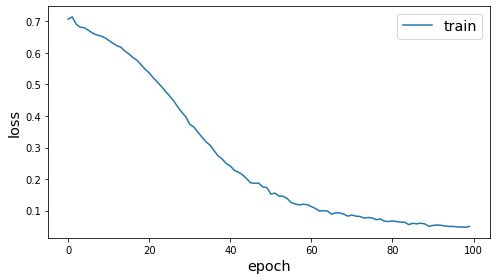

In [22]:
es = EarlyStopping(monitor="loss", min_delta=0, patience=20)
history = model.fit(gen, epochs=epochs, verbose=0, callbacks=[es])
plot_history(history)

In [24]:
G.node_features()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
G.nodes()

Int64Index([  31336, 1061127, 1106406,   13195,   37879, 1126012, 1107140,
            1102850,   31349, 1106418,
            ...
             626531, 1131180, 1130454, 1131184, 1128974, 1128975, 1128977,
            1128978,  117328,   24043],
           dtype='int64', length=2708)

In [27]:
x_emb_in, x_emb_out = gcn_model.in_out_tensors()

# for full batch models, squeeze out the batch dim (which is 1)
x_out = tf.squeeze(x_emb_out, axis=0)
emb_model = Model(inputs=x_emb_in, outputs=x_out)

In [28]:
train_subjects, test_subjects = model_selection.train_test_split(
    node_subjects, train_size=0.1, test_size=None, stratify=node_subjects
)

test_gen = fullbatch_generator.flow(test_subjects.index)
train_gen = fullbatch_generator.flow(train_subjects.index)

test_embeddings = emb_model.predict(test_gen)
train_embeddings = emb_model.predict(train_gen)

lr = LogisticRegression(multi_class="auto", solver="lbfgs")
lr.fit(train_embeddings, train_subjects)

y_pred = lr.predict(test_embeddings)
gcn_acc = (y_pred == test_subjects).mean()
print(f"Test classification accuracy: {gcn_acc}")

Test classification accuracy: 0.8022969647251845


In [29]:
all_embeddings = emb_model.predict(fullbatch_generator.flow(G.nodes()))

y = node_subjects.astype("category")
trans = TSNE(n_components=2)
emb_transformed = pd.DataFrame(trans.fit_transform(all_embeddings), index=G.nodes())
emb_transformed["label"] = y

KeyboardInterrupt: 

In [ ]:
alpha = 0.7

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(
    emb_transformed[0],
    emb_transformed[1],
    c=emb_transformed["label"].cat.codes,
    cmap="jet",
    alpha=alpha,
)
ax.set(aspect="equal", xlabel="$X_1$", ylabel="$X_2$")
plt.title("TSNE visualization of GCN embeddings for cora dataset")
plt.show()

In [147]:
wallet_of_interest = output.loc[output['cluster'] == random_cluster, :].index.tolist()
edge_df.loc[(edge_df['WinnerAddress'].isin(wallet_of_interest))|(edge_df['SellerAddress'].isin(wallet_of_interest))]

,SellerAddress,WinnerAddress,Timestamp,EventType,PaymenTokenSymbol,TotalPrice,TokenId,AssetContractAddress,AssetId,TransactionId,BidAmount,AssetNumSales,AssetOwnerAddress,FromAccountAddress,UsedEthscan,TransactionHash
17994,0x9b35dbc596f545739e25e203b41823251acdee17,0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,2020-08-26T11:31:41,successful,ETH,1100000000000000000,9182,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,530625,42460607.0,NaN,2,0x97ad156c48078cf174905ffb5cb7ca56295924b8,NaN,False,0x96de108ee09a1e937ad7e2b7659819ae4df9ad70db0d...
32431,0x9b35dbc596f545739e25e203b41823251acdee17,0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,2020-08-26T12:03:46,successful,ETH,1100000000000000000,8308,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,530103,42464569.0,NaN,1,0xdfc05563f947718ca9ebd9e685022a200a5075c8,NaN,False,0xebbc9af30fab43fbc7c8d38d4f13e31383eab4f57d9c...
71084,0x9b35dbc596f545739e25e203b41823251acdee17,0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,2020-08-26T11:01:49,successful,ETH,1100000000000000000,6259,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,528837,42456169.0,NaN,4,0xe77e4d3db3cde7c4cb708cd63b68b52581d93747,NaN,False,0x41e8ea855b386939142e8677a116df34874c972c791f...
79819,0x9b35dbc596f545739e25e203b41823251acdee17,0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,2020-08-26T12:03:49,successful,ETH,1400000000000000000,5769,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,528519,42464619.0,NaN,1,0xdfc05563f947718ca9ebd9e685022a200a5075c8,NaN,False,0x03867c8bd40e4c3b15e1194dc3641e716ba5615f8cfd...
82404,0x9b35dbc596f545739e25e203b41823251acdee17,0x53ede7cae3eb6a7d11429fe589c0278c9acbe21a,2020-08-28T11:57:51,successful,ETH,1100000000000000000,5620,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,528430,42848564.0,NaN,4,0x90e45ddcf0c6d4e3d1879bb3edf5ebeedd00f71b,NaN,False,0x9111023cd02adbefc65214029aca74dc9d3f16ec8424...
95675,0x9b35dbc596f545739e25e203b41823251acdee17,0x1d1ef89654fe251fef926a721c5a393dfc50b489,2020-11-17T12:21:50,successful,ETH,11000000000000000000,4851,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,178734,60574542.0,NaN,1,0xdfc05563f947718ca9ebd9e685022a200a5075c8,NaN,True,0x7d8a26546abbcaaa63d34d9f0c6bcdf6f63165f05bcf...
111041,0xa1b2c179955310fa41e561661d2c3f1ca90b1e36,NaN,2019-09-17T05:52:00,successful,ETH,450000000000000000,3906,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,179336,9757908.0,NaN,1,0xa1b2c179955310fa41e561661d2c3f1ca90b1e36,NaN,False,0xd8c7536545ad7d22dcb98ac2e2f91a909de7d46695cc...
147717,0xeee5eb24e7a0ea53b75a1b9ad72e7d20562f4283,0x9b35dbc596f545739e25e203b41823251acdee17,2020-12-21T19:18:53,successful,ETH,3700000000000000000,1904,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,179619,68433082.0,NaN,5,0xcb8172da4bf02e759f8c98acda2fa01b83bf1057,NaN,False,0x45a59f7e9ec820769f5ef6327ec99254b125c78b5766...
148909,0x9b35dbc596f545739e25e203b41823251acdee17,0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,2020-08-30T10:43:23,successful,ETH,1200000000000000000,1841,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176547,43258165.0,NaN,4,0xdfc05563f947718ca9ebd9e685022a200a5075c8,NaN,False,0x3cdefabd91871cc40a2d7ab0b563c66538d5cb89f88e...
155873,0x9b35dbc596f545739e25e203b41823251acdee17,0xa1b2c179955310fa41e561661d2c3f1ca90b1e36,2020-10-24T01:34:24,successful,ETH,5300000000000000000,1416,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,176548,55139366.0,NaN,4,0xdfc05563f947718ca9ebd9e685022a200a5075c8,NaN,True,0x7e1bef113c0e8ad2e0482b7cf5f35a6920423b4a0ca7...


In [106]:
output.head()

,0,cluster
0x000000000cc7e508b4b115e64d71ef374cfb7703,{'c_infomap': 65},65
0x000000aaee6a496aaf7b7452518781786313400f,{'c_infomap': 547},547
0x0006e4548aed4502ec8c844567840ce6ef1013f5,{'c_infomap': 317},317
0x00084121aec4309cb20db622a28c717720e888e0,{'c_infomap': 389},389
0x000e8c608473dcee93021eb1d39fb4a7d7e7d780,{'c_infomap': 431},431


In [78]:

Gs = sg.StellarGraph.from_networkx(G)
print(Gs.info())



StellarGraph: Undirected multigraph
 Nodes: 4912, Edges: 12226

 Node types:
  default: [4912]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [12226]
        Weights: all 1 (default)
        Features: none


In [79]:
# parameter specification
number_of_walks = 3
length = 5
batch_size = 50
epochs = 10
num_samples = [20, 20]
layer_sizes = [100, 100]
learning_rate = 1e-2

In [80]:
unsupervisedSamples = UnsupervisedSampler(
    Gs, nodes=G.nodes(), length=length, number_of_walks=number_of_walks
)

In [81]:
generator = GraphSAGELinkGenerator(Gs, batch_size, num_samples)
train_gen = generator.flow(unsupervisedSamples)

RuntimeError: This StellarGraph has no numeric feature attributes for nodesNode features are required for machine learning